In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [73]:
# Load raw dataset
df = pd.read_csv('../data/raw/card_transdata.csv')
print("The data has been downloaded successfully !")

The data has been downloaded successfully !


In [17]:
# First 5 rows of data
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [18]:
# Statistics
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [20]:
# Checking missing values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [21]:
# Checking for duplicated values
df.duplicated().sum()

0

In [27]:
# Checking each column
# column distance_from_home
print("The type of the column \'distance_from_home\' is : ", df['distance_from_home'].dtype)
print("The minimum value is : ", df['distance_from_home'].min())
print("The maximum value is : ", df['distance_from_home'].max())
print("The unique values of the column \'distance_from_home\' are : ", df['distance_from_home'].unique())


The type of the column 'distance_from_home' is :  float64
The minimum value is :  0.0048743850667442
The maximum value is :  10632.723672241103
The unique values of the column 'distance_from_home' are :  [57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496]


In [28]:
# column distance_from_last_transaction
print("The type of the column \'distance_from_last_transaction\' is : ", df['distance_from_last_transaction'].dtype)
print("The minimum value is : ", df['distance_from_last_transaction'].min())
print("The maximum value is : ", df['distance_from_last_transaction'].max())
print("The unique values of the column \'distance_from_last_transaction\' are : ", df['distance_from_last_transaction'].unique())


The type of the column 'distance_from_last_transaction' is :  float64
The minimum value is :  0.000118281615244
The maximum value is :  11851.10456494614
The unique values of the column 'distance_from_last_transaction' are :  [0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012]


In [29]:
# column ratio_to_median_purchase_price
print("The type of the column \'ratio_to_median_purchase_price\' is : ", df['ratio_to_median_purchase_price'].dtype)
print("The minimum value is : ", df['ratio_to_median_purchase_price'].min())
print("The maximum value is : ", df['ratio_to_median_purchase_price'].max())
print("The unique values of the column \'ratio_to_median_purchase_price\' are : ", df['ratio_to_median_purchase_price'].unique())


The type of the column 'ratio_to_median_purchase_price' is :  float64
The minimum value is :  0.004399239615964
The maximum value is :  267.8029421832708
The unique values of the column 'ratio_to_median_purchase_price' are :  [1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985]


### Note: ###
<p> As we can see in the columns :</p>

    - distance_from_home
    - distance_from_last_transaction
    - ratio_to_median_purchase_price

There are many numbers after comma.

Therefor we will round those values to only 2 decimals, to accelerate training process afterwards.


In [33]:
print("Before rounding the values: \n")
df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].head()

Before rounding the values: 



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.877857,0.311140,1.945940
1,10.829943,0.175592,1.294219
2,5.091079,0.805153,0.427715
3,2.247564,5.600044,0.362663
4,44.190936,0.566486,2.222767


In [37]:
df['distance_from_home'] = df['distance_from_home'].round(2)
df['distance_from_last_transaction'] = df['distance_from_last_transaction'].round(2)
df['ratio_to_median_purchase_price']= df['ratio_to_median_purchase_price'].round(2)
print(" ")

In [38]:
print("After rounding the values: \n")
df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].head()

After rounding the values: 



,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,57.88,0.31,1.95
1,10.83,0.18,1.29
2,5.09,0.81,0.43
3,2.25,5.60,0.36
4,44.19,0.57,2.22


In [30]:
# column repeat_retailer
print("The type of the column \'repeat_retailer\' is : ", df['repeat_retailer'].dtype)
print("The minimum value is : ", df['repeat_retailer'].min())
print("The maximum value is : ", df['repeat_retailer'].max())
print("The unique values of the column \'repeat_retailer\' are : ", df['repeat_retailer'].unique())


The type of the column 'repeat_retailer' is :  float64
The minimum value is :  0.0
The maximum value is :  1.0
The unique values of the column 'repeat_retailer' are :  [1. 0.]


In [39]:
# column used_chip
print("The type of the column \'used_chip\' is : ", df['used_chip'].dtype)
print("The minimum value is : ", df['used_chip'].min())
print("The maximum value is : ", df['used_chip'].max())
print("The unique values of the column \'used_chip\' are : ", df['used_chip'].unique())


The type of the column 'used_chip' is :  float64
The minimum value is :  0.0
The maximum value is :  1.0
The unique values of the column 'used_chip' are :  [1. 0.]


In [40]:
# column used_pin_number
print("The type of the column \'used_pin_number\' is : ", df['used_pin_number'].dtype)
print("The minimum value is : ", df['used_pin_number'].min())
print("The maximum value is : ", df['used_pin_number'].max())
print("The unique values of the column \'used_pin_number\' are : ", df['used_pin_number'].unique())


The type of the column 'used_pin_number' is :  float64
The minimum value is :  0.0
The maximum value is :  1.0
The unique values of the column 'used_pin_number' are :  [0. 1.]


In [41]:
# column online_order
print("The type of the column \'online_order\' is : ", df['online_order'].dtype)
print("The minimum value is : ", df['online_order'].min())
print("The maximum value is : ", df['online_order'].max())
print("The unique values of the column \'online_order\' are : ", df['online_order'].unique())


The type of the column 'online_order' is :  float64
The minimum value is :  0.0
The maximum value is :  1.0
The unique values of the column 'online_order' are :  [0. 1.]


In [42]:
# column fraud
print("The type of the column \'fraud\' is : ", df['fraud'].dtype)
print("The minimum value is : ", df['fraud'].min())
print("The maximum value is : ", df['fraud'].max())
print("The unique values of the column \'fraud\' are : ", df['fraud'].unique())


The type of the column 'fraud' is :  float64
The minimum value is :  0.0
The maximum value is :  1.0
The unique values of the column 'fraud' are :  [0. 1.]


In [44]:
# Count the number of unique values for each class
df['fraud'].value_counts()


0.0    912597
1.0     87403
Name: fraud, dtype: int64

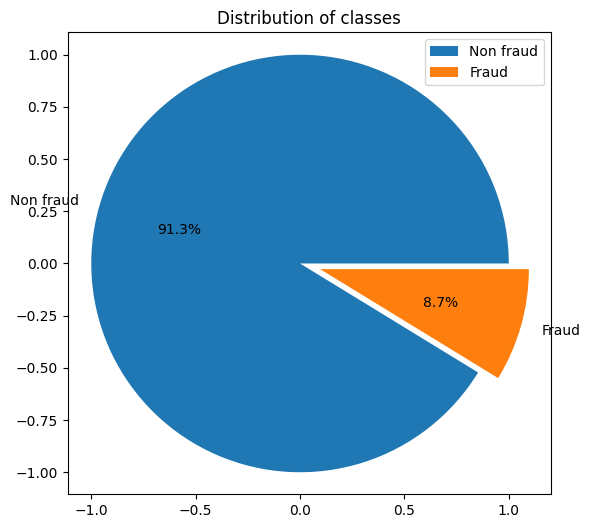

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df['fraud'].value_counts(), 
        labels=['Non fraud', 'Fraud'], 
        frame= True,
        autopct= '%1.1f%%',
        explode= [0, 0.1])
plt.title("Distribution of classes")
plt.legend()
plt.show()

<p> As we can see, the distribution of the classes — *fraud* vs *non-fraud* — is highly imbalanced. This imbalance can negatively affect the performance of machine-learning models, as they tend to be biased toward the majority class (non-fraudulent transactions) and may fail to correctly identify fraudulent ones. 

To address this issue, we need to apply resampling techniques such as **oversampling**, **undersampling**, or **SMOTE** in order to balance the dataset and ensure that both classes are equally represented during training.</p>

In [70]:
print("The final cleaned data is: ")
df

The final cleaned data is: 


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.88,0.31,1.95,1.0,1.0,0.0,0.0,0.0
1,10.83,0.18,1.29,1.0,0.0,0.0,0.0,0.0
2,5.09,0.81,0.43,1.0,0.0,0.0,1.0,0.0
3,2.25,5.60,0.36,1.0,1.0,0.0,1.0,0.0
4,44.19,0.57,2.22,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.21,0.11,1.63,1.0,1.0,0.0,0.0,0.0
999996,19.87,2.68,2.78,1.0,1.0,0.0,0.0,0.0
999997,2.91,1.47,0.22,1.0,1.0,0.0,1.0,0.0
999998,4.26,0.24,0.48,1.0,0.0,0.0,1.0,0.0


In [72]:
print("FIN")

FIN
